In [47]:
# import necessary modules
import datetime
import math

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import yfinance as yfin
import matplotlib.pyplot as plt

yfin.pdr_override()

In [48]:
# Initialize start and end dates: from 06.01.2005 to 06.06.2022
start = datetime.date(2014, 1, 6)
end = datetime.date(2023, 6, 6)

# Get average floating mortgage rate (%) data
floating_df = pdr.get_data_fred("MORTGAGE5US", start, end)
floating_df = floating_df.rename(columns={"MORTGAGE5US":"Avg rate"})
floating_df["Avg rate"] = floating_df["Avg rate"] * 0.01  # convert the values from percent to number

# Create Avg rate volatility dataframe
vol_floating_df = floating_df.rolling(52).std(ddof=1) * np.sqrt(52)  # .. and convert weekly vol to annualized vol
vol_floating_df = vol_floating_df.dropna()  # drop NaN values
vol_floating_df = vol_floating_df.rename(columns={"Avg rate":"Avg rate volatility (annualized)"})

# Get Fed Funds Rate (%) data
fedfunds_df = pdr.get_data_fred("FEDFUNDS", start, end)
fedfunds_df = fedfunds_df.rename(columns={"FEDFUNDS":"Fed Funds Rate"})
fedfunds_df["Fed Funds Rate"] = fedfunds_df["Fed Funds Rate"] * 0.01  # convert the values from percent to number

# Get Large Bank Consumer Mortgage Originations data
orig_df = pdr.get_data_fred("RCMFLOORIG", start, end)

# print first few lines of the dataframes
print("Dataframes to be used:")
print("............................................")
print(floating_df.head())
print("____________________________________________")
print(vol_floating_df.head())
print("____________________________________________")
print(orig_df.head())
print("____________________________________________")
print(fedfunds_df.head())

Dataframes to be used:
............................................
            Avg rate
DATE                
2014-01-09    0.0315
2014-01-16    0.0310
2014-01-23    0.0315
2014-01-30    0.0312
2014-02-06    0.0308
____________________________________________
            Avg rate volatility (annualized)
DATE                                        
2014-12-31                          0.004267
2015-01-08                          0.004068
2015-01-15                          0.004135
2015-01-22                          0.004278
2015-01-29                          0.004357
____________________________________________
            RCMFLOORIG
DATE                  
2014-04-01       85.19
2014-07-01       95.89
2014-10-01       97.68
2015-01-01      107.48
2015-04-01      135.87
____________________________________________
            Fed Funds Rate
DATE                      
2014-02-01          0.0007
2014-03-01          0.0008
2014-04-01          0.0009
2014-05-01          0.0009
2014-06-01  

## Liquidity Challenges in Issuing a Floating Rate Mortgage Bond ##
Economic contraction and increasing interest rates lead to heightened mortgage rates volatility, which leads to decline in new mortgage issuances.

Text(-0.15, -0.6, 'Economic contraction and increasing interest rates lead to heightened mortgage rates volatility, which leads to a decline in new mortgage issuances.')

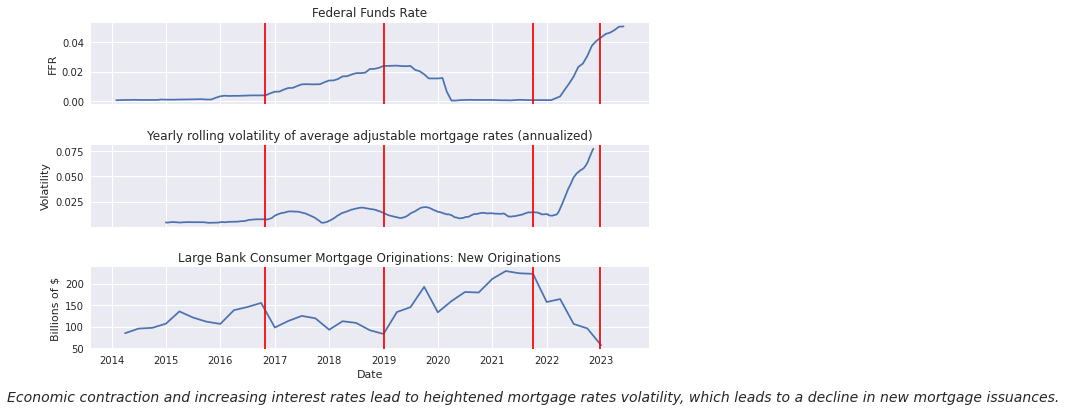

In [49]:
# Plot insights
plt.style.use("seaborn")
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0.5)

axs[0].plot(fedfunds_df)
axs[0].set_title("Federal Funds Rate")
axs[0].set_ylabel("FFR")
axs[0].axvline(17100, 0, 1, c="r")
axs[0].axvline(17900, 0, 1, c="r")
axs[0].axvline(18900, 0, 1, c="r")
axs[0].axvline(19350, 0, 1, c="r")

axs[1].plot(vol_floating_df)
axs[1].set_title("Yearly rolling volatility of average adjustable mortgage rates (annualized)")
axs[1].set_ylabel("Volatility")
axs[1].axvline(17100, 0, 1, c="r")
axs[1].axvline(17900, 0, 1, c="r")
axs[1].axvline(18900, 0, 1, c="r")
axs[1].axvline(19350, 0, 1, c="r")

axs[2].plot(orig_df)
axs[2].set_ylabel("Billions of $")
axs[2].set_title("Large Bank Consumer Mortgage Originations: New Originations")
axs[2].set_xlabel("Date")
axs[2].axvline(17100, 0, 1, c="r")
axs[2].axvline(17900, 0, 1, c="r")
axs[2].axvline(18900, 0, 1, c="r")
axs[2].axvline(19350, 0, 1, c="r")

axs[2].text(-0.15, -0.60, "Economic contraction and increasing interest rates lead to heightened mortgage rates volatility, which leads to a decline in new mortgage issuances.", transform=axs[2].transAxes, fontsize=14, va='center', fontstyle="italic")